<a href="https://colab.research.google.com/github/Nrk3098/TASK-1-The-Sparks-Foundation/blob/main/Task_6_Prediction_using_decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation-GRIP-Data Science & Business Analytics**

# **Author:Namrata Khairnar**

 **Task 6 - Prediction using Decision Tree Algorithm**

**Problem Statement:**

   *  Create the Decision Tree classifier & visualize it graphically.The purpose is if we feed any new data to this classifier,it would be able to predict the right class accordingly.
    

**Importing the libraries**

In [ ]:
# In this step we will import the required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

# To ignore the warnings
import warnings as wg
wg.filterwarnings('ignore')




**Loading the Dataset**

In [ ]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:]
y=iris.target

**Exploratory Data Anaysis**

In [ ]:
# Input data

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal width","Sepal length","sepal width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x:iris['target_names'][x])

data.head()

,Petal length,Petal width,Sepal length,sepal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.describe()

,Petal length,Petal width,Sepal length,sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Visualization comparing various features**

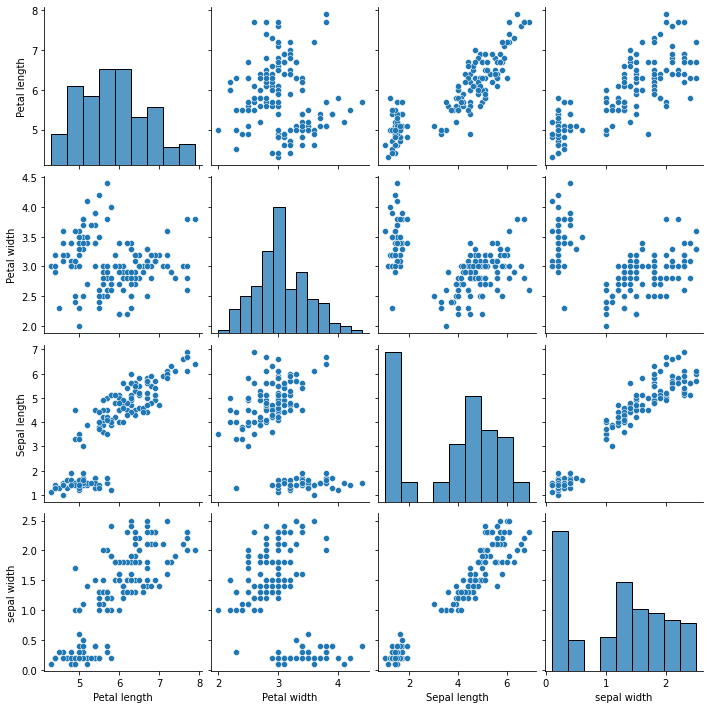

In [ ]:
# Input data visualisation
sns.pairplot(data)

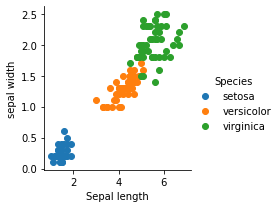

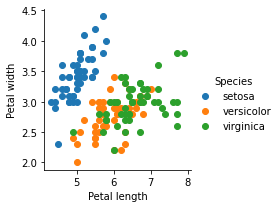

In [ ]:
# Scatter plot of data based on sepal length & width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal length','sepal width').add_legend()
plt.show()

#Scatter plot of data based on petal length & width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal width').add_legend()
plt.show()


**Decision Tree Model Training**

In [ ]:
# Model Training 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
y_pred = tree_classifier.predict(X_test)

**Comparing the actual & predicted flower classification**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


**Visualizing the trained model**

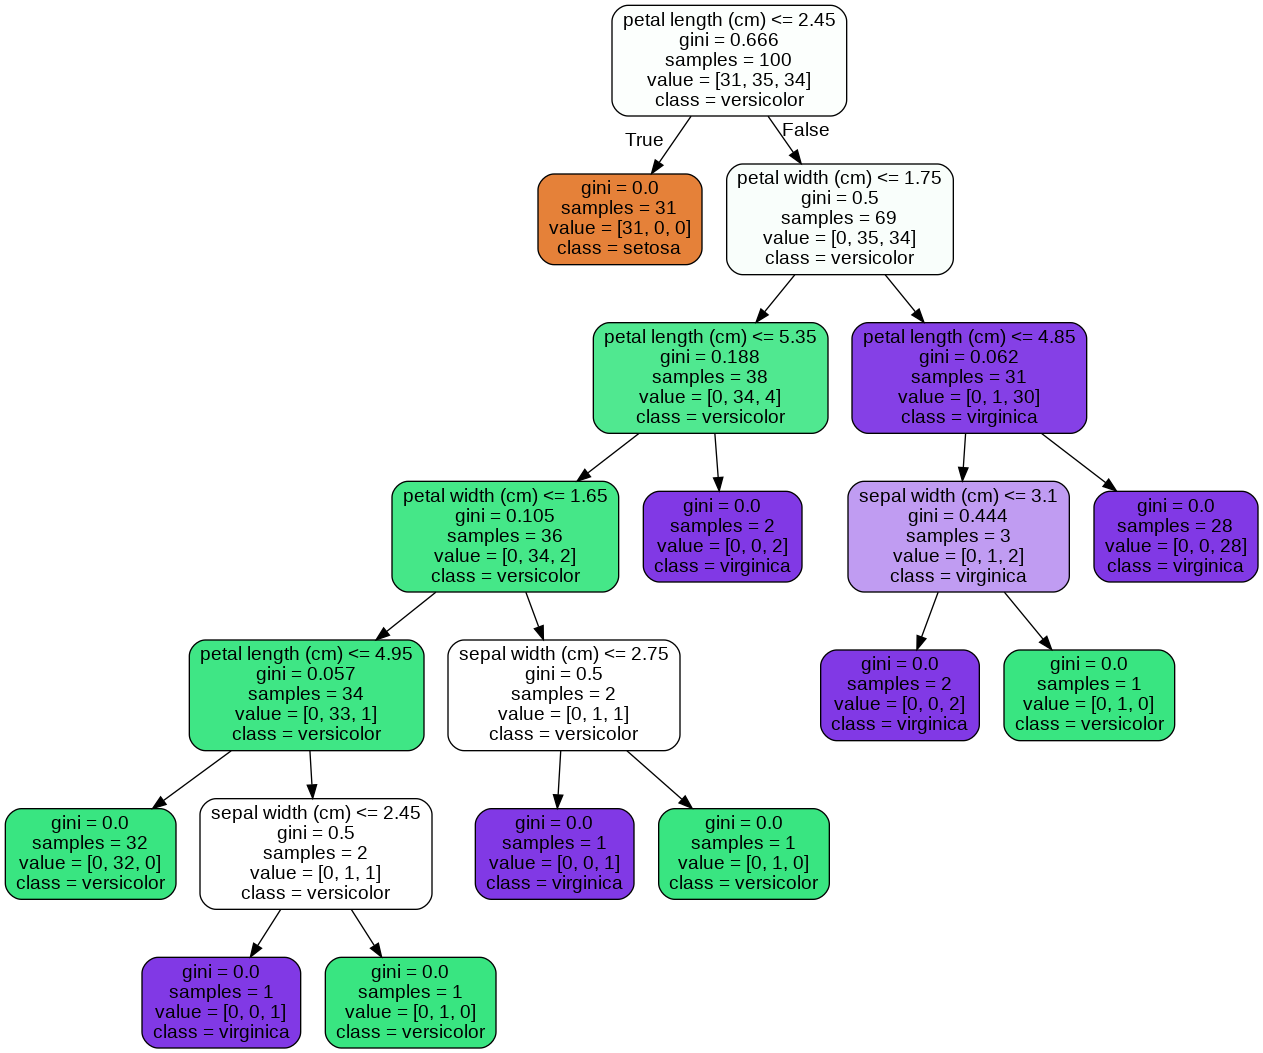

In [ ]:
# Visualizing the trained decision tree classifier taking all 4 features in consideration

export_graphviz(
    tree_classifier,
    out_file="img\desision_tree.dot",
    feature_names=iris.feature_names[:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

(graph,)=pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')




**Import the DecisionTreeClassifier and fit the model**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

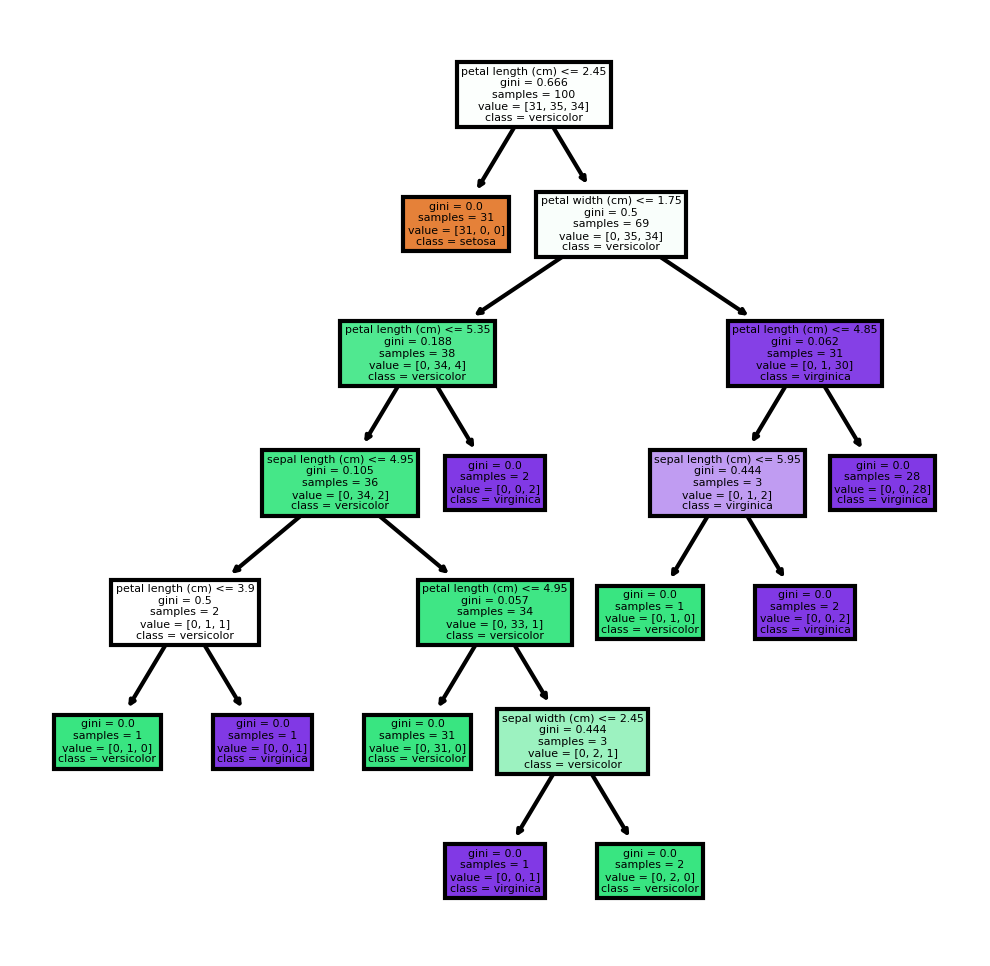

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree


a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);

**Predicting the class output for some random values of petal and sepal length and width**

In [ ]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 3.5cm and 2.2cm and sepal length and width are 1.1cm and 0.1cm. ")
print()
print('Output = ',tree_classifier.predict([[3.5, 2.2, 1.1, 0.1]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 3.5cm and 2.2cm and sepal length and width are 1.1cm and 0.1cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


**Calculating the Model accuracy**

In [ ]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 0.98


**Conclusion**

**I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.**

**Thank You**